In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ndata = pd.read_csv("NextData.csv")

In [3]:
ndata.head()

,Advertiser,Advertiser ID,Advertiser Status,Advertiser Integration Code,Time of Day,Country,Device Type,Advertiser Currency,Impressions,Active View: Measurable Impressions,Active View: Viewable Impressions,Clicks,Revenue (Adv Currency)
0,Next_UK_Zenith,378754,Active,NaN,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673
1,Next_UK_Zenith,378754,Active,NaN,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391
2,Next_UK_Zenith,378754,Active,NaN,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858
3,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433
4,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097


In [4]:
ndata = ndata.drop(ndata.index[336::])

In [5]:
ndata = ndata.drop(["Advertiser ID", "Advertiser Status", "Advertiser Integration Code"], axis=1)

In [6]:
ndata.tail()

,Advertiser,Time of Day,Country,Device Type,Advertiser Currency,Impressions,Active View: Measurable Impressions,Active View: Viewable Impressions,Clicks,Revenue (Adv Currency)
331,Next_UK_Zenith,8.0,AU,Desktop,GBP,54393.0,53375.0,24957.0,41.0,109.464148
332,Next_UK_Zenith,9.0,CZ,Desktop,GBP,11734.0,11593.0,5158.0,25.0,34.568392
333,Next_UK_Zenith,9.0,GB,Smart Phone,GBP,357093.0,333585.0,138886.0,1481.0,985.659847
334,Next_UK_Zenith,9.0,RU,Desktop,GBP,254583.0,251489.0,116124.0,251.0,383.502848
335,Next_UK_Zenith,9.0,SK,Desktop,GBP,82911.0,81246.0,33392.0,81.0,102.547073


In [7]:
ndata.columns

Index(['Advertiser', 'Time of Day', 'Country', 'Device Type',
       'Advertiser Currency', 'Impressions',
       'Active View: Measurable Impressions',
       'Active View: Viewable Impressions', 'Clicks',
       'Revenue (Adv Currency)'],
      dtype='object')

In [8]:
ndata.columns=['Advertiser', 'TOD', 'Country', 'DeviceType',
       'AdvertiserCurrency', 'Impressions',
       'MeasurableImpressions',
       'ViewableImpressions', 'Clicks',
       'Spend']

In [9]:
ndata.head()

,Advertiser,TOD,Country,DeviceType,AdvertiserCurrency,Impressions,MeasurableImpressions,ViewableImpressions,Clicks,Spend
0,Next_UK_Zenith,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673
1,Next_UK_Zenith,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391
2,Next_UK_Zenith,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858
3,Next_UK_Zenith,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433
4,Next_UK_Zenith,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097


In [10]:
ndata["CTR"] = ndata.Clicks / ndata.Impressions
ndata["CPM"] = ndata.Spend / ndata.Impressions * 1000
ndata["Viewability"] = ndata.ViewableImpressions / ndata.MeasurableImpressions

In [11]:
ndata.Country = ndata.Country.astype("category")
ndata.DeviceType = ndata.DeviceType.astype("category")

In [12]:
ndata.head()

,Advertiser,TOD,Country,DeviceType,AdvertiserCurrency,Impressions,MeasurableImpressions,ViewableImpressions,Clicks,Spend,CTR,CPM,Viewability
0,Next_UK_Zenith,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673,0.000187,0.939604,0.266071
1,Next_UK_Zenith,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391,0.000786,2.133181,0.391374
2,Next_UK_Zenith,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858,0.000188,0.802209,0.253057
3,Next_UK_Zenith,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433,0.001669,3.201921,0.623027
4,Next_UK_Zenith,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097,0.000924,2.367791,0.516460


---

In [13]:
#below we explore subplots

/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


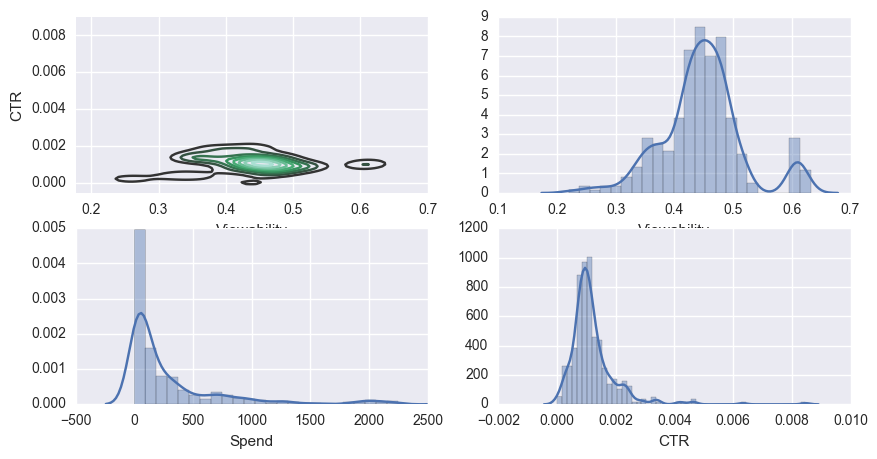

In [88]:
#syntax is fig, something=plt.subplots(numberOfRows, numberOfColumns)
#then pass this something into ax=something in your charts
#****importantly that make sure the plots are run at the same time as your subplots so it can be displayed
f, ggg = plt.subplots(2, 2, figsize=[10, 5])
sns.kdeplot(ndata.Viewability.head(100), ndata.CTR.head(100), ax=ggg[0, 0])
sns.distplot(ndata.Viewability, ax=ggg[0, 1])
sns.distplot(ndata.Spend, ax=ggg[1, 0])
sns.distplot(ndata.CTR, ax=ggg[1, 1])

/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


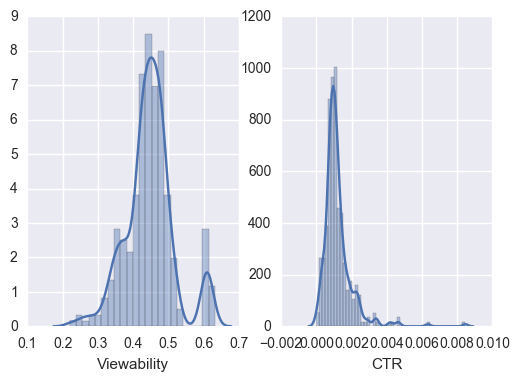

In [90]:
#caveat: some plots don't take ax argument, lmplot being one of them
#caveat: when there is only 1 row defined in subplots, the ax argument in the plot should be 1 number instead of matrix
f, ax1 = plt.subplots(1, 2)
sns.distplot(ndata.Viewability, ax=ax1[0])
sns.distplot(ndata.CTR, ax=ax1[1])

/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


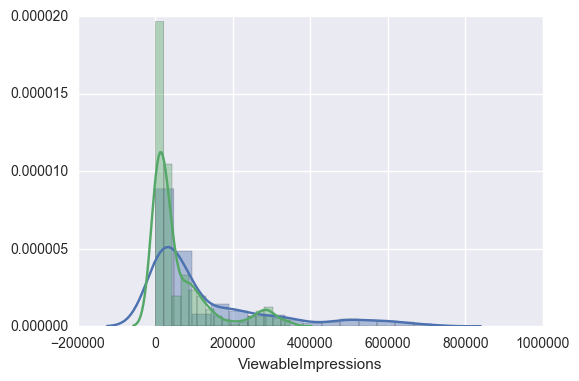

In [92]:
#we can also plot 2 plots in the same one using subplot
f, ax1 = plt.subplots(1, 1)
sns.distplot(ndata.MeasurableImpressions, ax=ax1)
sns.distplot(ndata.ViewableImpressions, ax=ax1)

In [93]:
#subplots can also take sharex=Boolean and sharey=Boolean